In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
from szar.counts import ClusterCosmology
from szar.szproperties import SZ_Cluster_Model, Profiles
from szar.foregrounds import fgNoises, f_nu
from szar.ilc import ILC_simple, ILC_simple_pol, Filters
import sys,os
from configparser import SafeConfigParser
import pickle as pickle
from orphics.io import dict_from_section, list_from_config, Plotter
from orphics.cosmology import noise_func


home = "/Users/nab/Repos/SZ_filter/"
homeout = "/Users/nab/Repos/SZ_filter/test_output/"

iniFile = home+"/input/pipeline.ini"
Config = SafeConfigParser()
Config.optionxform=str
Config.read(iniFile)

constDict = dict_from_section(Config,'constants')
clusterDict = dict_from_section(Config,'cluster_params')
fparams = {}   # the                                                                                                                 
for (key, val) in Config.items('params'):
    if ',' in val:
        param, step = val.split(',')
        fparams[key] = float(param)
    else:
        fparams[key] = float(val)
        
cc = ClusterCosmology(fparams,constDict,lmax=8000,pickling=True)#clTTFixFile=clttfile)                                               

fgs = fgNoises(cc.c,ksz_file=home+"input/ksz_BBPS.txt",ksz_p_file=home+"input/ksz_p_BBPS.txt",\
               tsz_cib_file=home+"input/sz_x_cib_template.txt",\
               tsz_battaglia_template_csv=home+"data/sz_template_battaglia.csv",\
               rs_template=home+"input/fiducial_scalCls_lensed_5_5.txt",\
               rsx_template=home+"input/fiducial_scalCls_lensed_1_5.txt")
thk = 2.5

experimentName = "SO-v3-goal-40"
#experimentName = "CCATP-SO-MSIP"                                                                                                         
beams = list_from_config(Config,experimentName,'beams')
noises = list_from_config(Config,experimentName,'noises')
freqs = list_from_config(Config,experimentName,'freqs')
lmax = int(Config.getfloat(experimentName,'lmax'))
try:
    v3mode = Config.getint(experimentName,'V3mode')
except:
    v3mode = -1
lknee = list_from_config(Config,experimentName,'lknee')[0]
alpha = list_from_config(Config,experimentName,'alpha')[0]
fsky = Config.getfloat(experimentName,'fsky')
    
print v3mode

ls = np.arange(2,8000,10)
yrang = [1e-3,1e5]
xrang = [100.,9000.]
fac_norm = ls*(ls+1.)/(2.*np.pi) * cc.c['TCMBmuK']**2


if v3mode>-1:
    print("V3 flag enabled.")
    import szar.V3_calc_public as v3
    v3lmax = ls.max()
    v3dell = np.diff(ls)[0]
    v3ell, N_ell_T_LA, N_ell_P_LA, Map_white_noise_levels = v3.Simons_Observatory_V3_LA_noise(sensitivity_mode=v3mode,f_sky=fsky,ell_max=v3lmax+v3dell,delta_ell=v3dell)

#########    
print "TESTING PROJECTION"

pp = Profiles(cc)
print cc.rdel_c(2e13,0.5,200) # / cc.c['MPC2CM']
print "rhoc_z test", cc.rhoc(0.5)
tht= np.array([ 1.2 ,  2.15,  3.1 ,  4.05,  5.  ] )
M = 2e13
z = 0.5
print pp.make_a_profile_test(tht,M,z)
print pp.make_a_obs_profile_test(tht,M,z)

Populating the interactive namespace from numpy and matplotlib

/Users/nab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: The SafeConfigParser class has been renamed to ConfigParser in Python 3.2. This alias will be removed in future versions. Use ConfigParser directly instead.
/Users/nab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: You passed a bytestring as `filenames`. This will not work on Python 3. Use `cp.read_file()` or switch to using Unicode strings across the board.



Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_8000_20181019.pkl
Loaded cached Cls from  output/clphi_low_acc_False_8000_20181019.txt
2
V3 flag enabled.
sky area:  16501.1844998 degrees^2
white noise level:  [ 52.0853286   26.78674042   5.80379376   6.25023943  14.88152246
  37.20380614] [uK-arcmin]
TESTING PROJECTION
[ 0.36619106]
rhoc_z test 4.86170029812e+11
(array([ 0.62700112,  0.34089062,  0.21382022,  0.14719661,  0.1078843 ]), array([  1.05797402e+13,   7.80368347e+12,   5.61830831e+12,
         4.15615471e+12,   3.17180264e+12]))
(array([ 0.38731847,  0.30717884,  0.20576689,  0.14442806,  0.10670407]), array([  6.61612104e+12,   6.83640343e+12,   5.32683748e+12,
         4.04721755e+12,   3.12431804e+12]))


12.0
[ 2.25  2.5   2.75  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.  ]
[  4.39910441e-01   1.68383079e-01   4.72582976e-02   9.01050167e-03
   1.08132680e-03   7.56742083e-05   2.86132739e-06   5.41578969e-08
   4.75418882e-10   1.79331790e-12   2.69308579e-15   1.49176689e-18]
[ 0.17079645  0.12074606  0.06672607  0.039485    0.02591061]
[ 0.17125813  0.11971961  0.06504987  0.03836811  0.02517489]
[ 0.38731847  0.30717884  0.20576689  0.14442806  0.10670407]
[ 1.53750608  1.58553702  1.62580083  1.66260396  1.6969786   1.72945352
  1.76036137  1.78993496  1.81834822  1.84573688  1.87221021  1.89785826
  1.92275661  1.94696956  1.97055252  1.99355368  2.0160153   2.03797473
  2.05946517  2.08051629  2.10115477  2.12140469  2.14128785  2.16082412
  2.1800316   2.19892688  2.21752521  2.23584061  2.25388605  2.2716735
  2.28921411  2.3065182   2.32359541  2.34045474  2.35710458  2.37355281
  2.38980681  2.40587352  2.42175947  2.43747081  2.45301335  2.46839258
  2.48361367  2.4

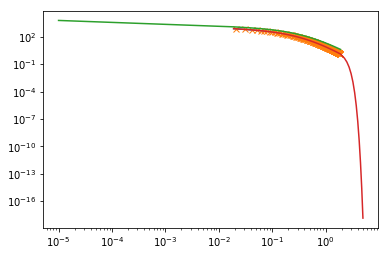

In [4]:
from scipy.interpolate import interp1d


homedata = '/Users/nab/Desktop/Projects/Filtering/'
f = homedata + 'x_P_rho_Batt_BAH_BAHhi_BAHlo_EAG_TNG_z1.0_M2001E14.txt'

x,pres,rho = np.loadtxt(f,usecols=[0,1,7],unpack =True,skiprows=1)
x1,pres1,rho1 = np.loadtxt(f,usecols=[0,1,7],unpack =True)

plt.loglog(x,rho)
#plt.loglog(x,pres)

intp = pp.interpol_sim_profile(x1,pres1)
intr = pp.interpol_sim_profile(x1,rho1)

ans1 = interp1d(x,rho,kind='slinear',bounds_error=False,fill_value=0)
ans2 = interp1d(x,pres,kind='slinear',bounds_error=False,fill_value=0)

extend = np.poly1d(np.polyfit(x, np.log(rho), 3))

fine_fac = 4.

xtr_inds = np.floor(5 - np.max(x))*fine_fac
str_xtr = np.ceil(np.max(x)) + 1./fine_fac

print xtr_inds

xtr = np.arange(xtr_inds)/fine_fac + str_xtr
print xtr
print np.exp(extend(xtr))

ans1 = interp1d(np.append(x,xtr),np.append(rho,np.exp(extend(xtr))),kind='slinear',bounds_error=False,fill_value=0)

xx = np.arange(0.001,1.9,0.01)
plt.plot(xx,ans1(xx),'x')

blah1 =  pp.make_a_obs_profile_sim(tht,M,z,ans1,ans2)
blah2 = pp.make_a_obs_profile_sim(tht,M,z,intr,intp)
blah3 = pp.make_a_obs_profile_test(tht,M,z)

theta_sim_rho = np.array([3.6337402156859753, 1.0369351928324118, 3.3290812595973063])
rhotest = pp.rho_sim_test(theta_sim_rho,x1)

Msol_cgs = 1.989e33
kpc_cgs = 3.086e21
rhoc = 2.77525e2

norm = rhoc * Msol_cgs / kpc_cgs / kpc_cgs / kpc_cgs
norm2 = rhoc * Msol_cgs / kpc_cgs / kpc_cgs / kpc_cgs #* 0.16

plt.plot(x1,rhotest/norm2)
plt.plot(np.append(x,xtr),np.append(rho,np.exp(extend(xtr))))

print blah1[0]*norm #/ blah3[0]
print blah2[0]*norm #/ blah3[0]
print blah3[0]

#[ 0.1693005   0.12455647  0.07367426  0.04419839  0.02902064]

print rhotest/norm2/rho1

In [ ]:
for ii,(testFreq,fwhm,noiseT) in enumerate(zip(freqs,beams,noises)):
#for ii,(fwhm,noiseT,testFreq) in zip(beams,noises,freqs):
    totCl = 0.

    if v3mode>-1:
        noise = N_ell_T_LA[ii]/ cc.c['TCMBmuK']**2.
    else:
        #noise = ( noise_func(self.evalells,fwhm,noise,lknee,alpha,dimensionless=False) / self.cc.c['TCMBmuK']**2.)
        noise = noise_func(ls,fwhm,noiseT,lknee,alpha,dimensionless=False) / cc.c['TCMBmuK']**2.

    radio = fgs.rad_ps(ls,testFreq,testFreq)/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    cibp = fgs.cib_p(ls,testFreq,testFreq) /ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    cibc = fgs.cib_c(ls,testFreq,testFreq)/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    tsz = fgs.tSZ(ls,testFreq,testFreq)/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    tsz_cib = np.abs(fgs.tSZ_CIB(ls,testFreq,testFreq)/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.)
    ksz = fgs.ksz_temp(ls)/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    rs_auto = fgs.rs_auto(ls,testFreq,testFreq)/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    rs_cross = fgs.rs_cross(ls,testFreq)/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    
    pol_dust = fgs.gal_dust_pol(ls,testFreq,testFreq) /ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    pol_ps   = fgs.rad_pol_ps(ls,testFreq,testFreq) /ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
    pol_sync = fgs.gal_sync_pol(ls,testFreq,testFreq) /ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.

    totCl = cc.theory.lCl('TT',ls)+ksz+radio+cibp+cibc+noise+tsz+tsz_cib
    oldtotCl = cc.theory.lCl('TT',ls)+noise

    fig = plt.figure(figsize=(10,8))
    rc('axes', linewidth=thk)
    plt.tick_params(which='both',size=14,width=thk,labelsize = 24)
    plt.tick_params(which='major',size=18,width=thk,labelsize = 24)
    plt.xlabel(r'$\ell$', fontsize=32,weight='bold')
    plt.ylabel(r'$C_\ell \ell (\ell + 1) [\mu K]$', fontsize=32,weight='bold')
    plt.xlim(xrang)
    plt.ylim(yrang)
    plt.semilogy(ls,cc.theory.uCl('TT',ls)*fac_norm,alpha=0.3,ls="--",label="CMB unlens")
    plt.plot(ls,cc.theory.lCl('TT',ls)*fac_norm,label="CMB")
    plt.plot(ls,noise*fac_norm,label="noise "+str(noiseT)+"uK'")
    plt.plot(ls,ksz*fac_norm,label="ksz",alpha=0.2,ls="--")
    plt.plot(ls,tsz*fac_norm,label="tsz",alpha=0.2,ls="--")
    plt.plot(ls,tsz_cib*fac_norm,label="tsz-cib",alpha=0.2,ls="--")
    # pl.add(ls,kszAlt*ls**2.,label="ksz",alpha=0.5,ls="--")                                                                                   
    plt.plot(ls,radio*fac_norm,label="radio",alpha=0.2,ls="--")
    plt.plot(ls,cibp*fac_norm,label="cibp",alpha=0.2,ls="--")
    plt.plot(ls,cibc*fac_norm,label="cibc",alpha=0.2,ls="--")
    plt.plot(ls,rs_auto*fac_norm,label="rs",ls="-")
    plt.plot(ls,np.abs(rs_cross)*fac_norm,label="rsx",ls="-")
    plt.plot(ls,totCl*fac_norm,label="total")
    plt.plot(ls,oldtotCl*fac_norm,label="total w/o fg",alpha=0.7,ls="--")
    
    #print np.max(rs_auto*fac_norm)
    
    leg = legend(loc=0,numpoints=1,prop={"size":14})
    leg.draw_frame(False)
    plt.savefig(homeout+'test_fgs_nu'+str(freqs)+'GHz.png', bbox_inches='tight',format='png')
    

In [ ]:
rs_cross = fgs.rs_cross(ls,freqs[3])/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.
#noise = N_ell_T_LA[4]/ cc.c['TCMBmuK']**2.

#noise = np.sum(1./(1./N_ell_T_LA),axis=0)/ cc.c['TCMBmuK']**2.

save_sum = ls * 0.0
for jj in xrange(len(ls)):
    save_inv = 0
    for ii in xrange(len(freqs)):
         save_inv += 1./((N_ell_T_LA[ii][jj])**2)

    save_sum[jj] = save_inv
noise = 1./np.sqrt(save_sum) / cc.c['TCMBmuK']**2
tot_noise = (rs_cross + noise) * np.sqrt(2. / ((2.*ls+1.)*10*fsky))

print np.sum((rs_cross/tot_noise)**2)

In [ ]:
ILC  = ILC_simple(clusterCosmology=cc,fgs=fgs,rms_noises = noises,fwhms=beams,freqs=freqs,lmax=lmax,lknee=lknee,alpha=alpha)

lsedges = np.arange(100,3001,50)
el_il,  cls_il,  err_il,  s2ny  = ILC.Forecast_Cellyy(lsedges,fsky)
el_ilc, cls_ilc, err_ilc, s2n = ILC.Forecast_Cellcmb(lsedges,fsky)

el_ilrs, cls_ilrs, err_ilrs, s2rs = ILC.Forecast_Cellrsx(lsedges,fsky)

In [ ]:
#print fgs.rs_cross(ls,freqs[3]).shape#/ls/(ls+1.)*2.*np.pi/ cc.c['TCMBmuK']**2.

fac_norm = el_ilc*(el_ilc+1.)/(2.*np.pi) * cc.c['TCMBmuK']**2
fac_norm2 = ls*(ls+1.)/(2.*np.pi) * cc.c['TCMBmuK']**2
fig = plt.figure(figsize=(10,8))
rc('axes', linewidth=thk)
plt.tick_params(which='both',size=14,width=thk,labelsize = 24)
plt.tick_params(which='major',size=18,width=thk,labelsize = 24)
plt.xlabel(r'$\ell$', fontsize=32,weight='bold')
plt.ylabel(r'$C_\ell \ell (\ell + 1) [\mu K]$', fontsize=32,weight='bold')
plt.semilogy(el_ilc, cls_ilc*fac_norm)
plt.plot(el_ilc, err_ilc*fac_norm)
plt.plot(ls,noise*fac_norm2)
plt.errorbar(el_ilc, cls_ilc*fac_norm, yerr=err_ilc*fac_norm)

print s2n

fac_norm = el_il*(el_il+1.)/(2.*np.pi) * cc.c['TCMBmuK']**2

fig = plt.figure(figsize=(10,8))
rc('axes', linewidth=thk)
plt.tick_params(which='both',size=14,width=thk,labelsize = 24)
plt.tick_params(which='major',size=18,width=thk,labelsize = 24)
plt.xlabel(r'$\ell$', fontsize=32,weight='bold')
plt.ylabel(r'$C_\ell \ell (\ell + 1) [\mu K]$', fontsize=32,weight='bold')
plt.semilogy(el_il, cls_il*fac_norm)
plt.plot(el_il, err_il*fac_norm)
plt.errorbar(el_il, cls_il*fac_norm, yerr=err_il*fac_norm)

print s2ny

fig = plt.figure(figsize=(10,8))
rc('axes', linewidth=thk)
plt.tick_params(which='both',size=14,width=thk,labelsize = 24)
plt.tick_params(which='major',size=18,width=thk,labelsize = 24)
plt.xlabel(r'$\ell$', fontsize=32,weight='bold')
plt.ylabel(r'$C_\ell \ell (\ell + 1) [\mu K]$', fontsize=32,weight='bold')
plt.semilogy(el_ilrs, np.abs(cls_ilrs)*fac_norm)
plt.plot(el_ilrs, err_ilrs*fac_norm)
plt.errorbar(el_ilrs, np.abs(cls_ilrs)*fac_norm, yerr=err_ilrs*fac_norm)

print s2rs

# Filter tests for Colin's curves

In [ ]:
el,nellcmb,nellyy = np.loadtxt(homedata+'S4_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',unpack=True)

fac_norm2 = el*(el+1.)/(2.*np.pi)
beams = 2.
plt.loglog(el,nellcmb*fac_norm2,label="Nell")
plt.plot(el,cc.theory.lCl('TT',el)*fac_norm2*cc.c['TCMBmuK']**2,label="CMB")

#toterr = np.sqrt(1. / (fsky * (2.*el + 1))) * (cc.theory.lCl('TT',el)*cc.c['TCMBmuK']**2 + nellcmb)
toterr = (cc.theory.lCl('TT',el)*cc.c['TCMBmuK']**2 + nellcmb)
plt.plot(el,toterr*fac_norm2,label="Total Nell")

leg = legend(loc=0,numpoints=1,prop={"size":18})
leg.draw_frame(False)

Filt = Filters()

plt.plot(el,Filt.beam_func(el,beams))

thetavec = np.linspace(0.7, 5., 6.) 

blah = np.zeros([6,6])

for i in xrange(len(thetavec)):
    for j in xrange(len(thetavec)-i):
        print thetavec[i],thetavec[j+i]
        blah[i,j+i] = Filt.filter_var(thetavec[i],thetavec[j+i],el,toterr,beam=beams)

print blah

#plt.plot(el,nellyy)


